In [1]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harrychandan28
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
customers=pd.read_csv("/content/focusing-on-mobile-app-or-website/Ecommerce Customers")

In [8]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [10]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


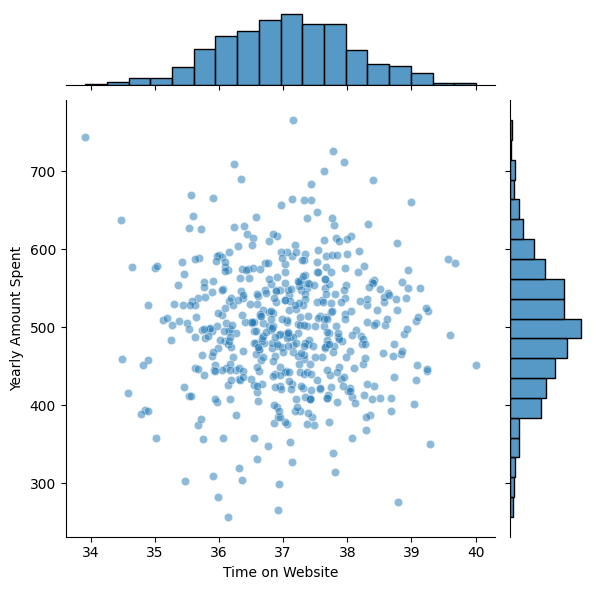

In [12]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,alpha=0.5)

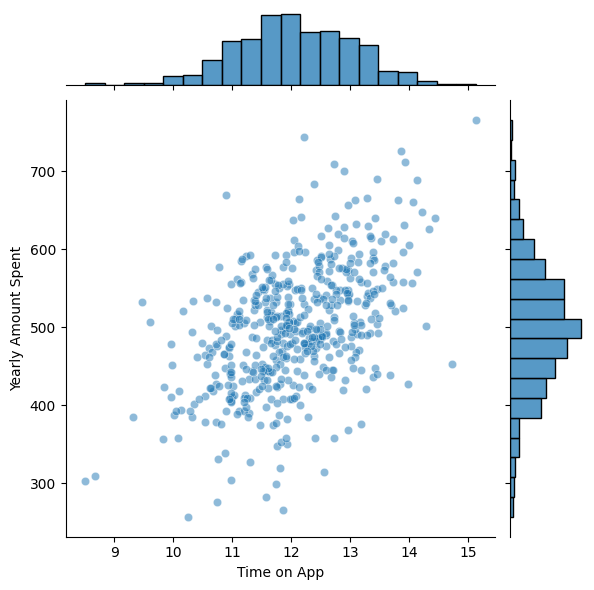

In [13]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,alpha=0.5)

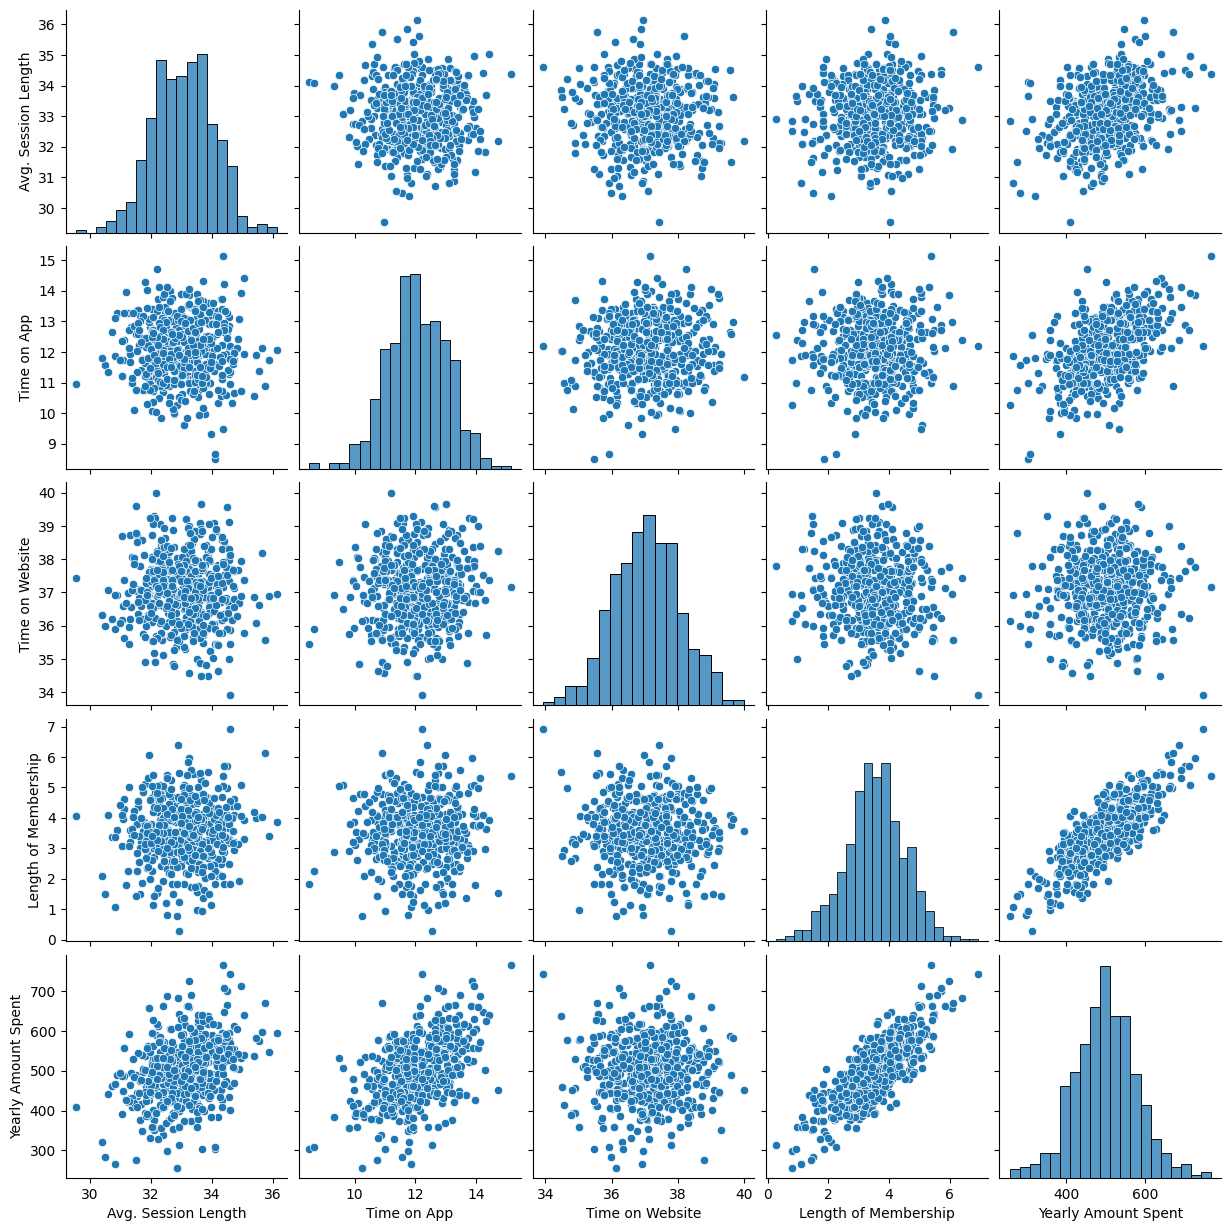

In [18]:
sns.pairplot(customers)

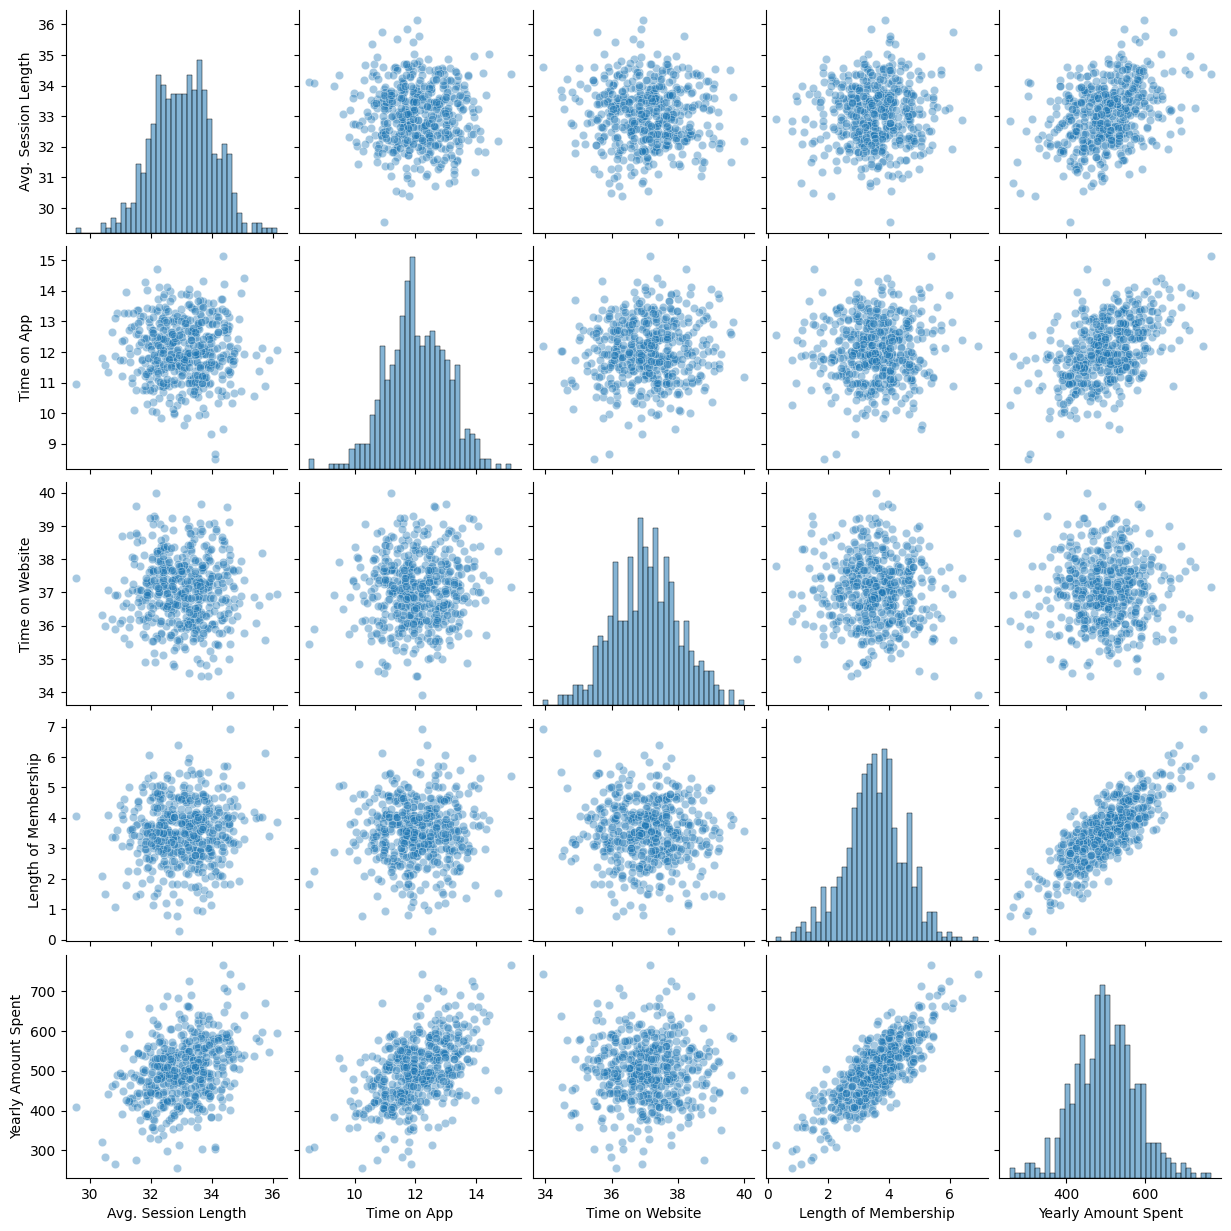

In [21]:
sns.pairplot(customers,kind='scatter',plot_kws={'alpha':0.4},diag_kws={'alpha':0.55,'bins':40})

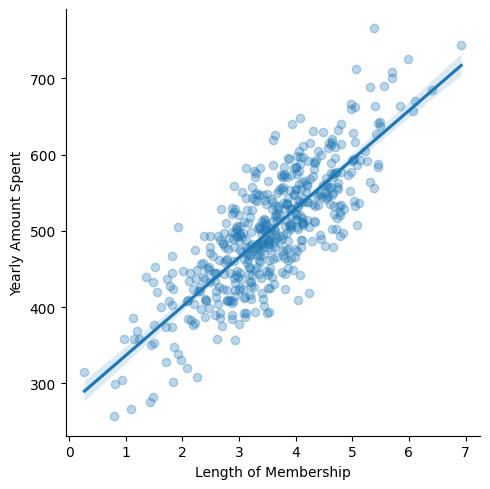

In [23]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,scatter_kws={'alpha':0.3})

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [27]:
X=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership' ]]
y=customers['Yearly Amount Spent']

In [31]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [32]:
y.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm=LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [40]:
lm.score(X,y)

0.9842727142336021

In [44]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
print(cdf)

                          Coeff
Avg. Session Length   25.981550
Time on App           38.590159
Time on Website        0.190405
Length of Membership  61.279097


In [49]:
prediction=lm.predict(X_test)

<Axes: xlabel='Yearly Amount Spent'>

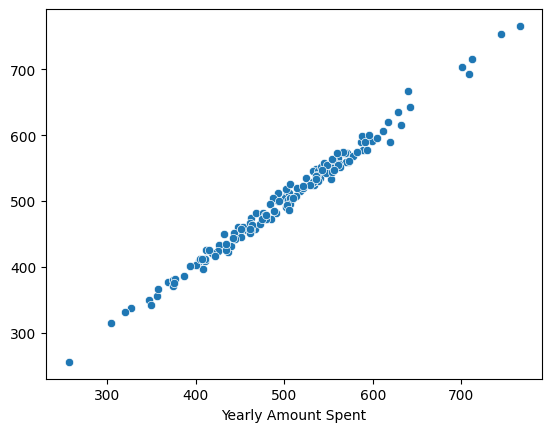

In [50]:
sns.scatterplot(x=y_test,y=prediction)

<Axes: title={'center': 'yearly Amount spent vs. Model Prediction'}, xlabel='Yearly Amount Spent', ylabel='prediction'>

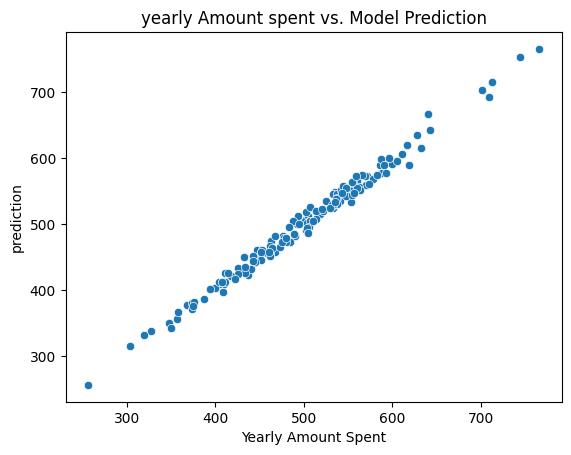

In [61]:
plt.ylabel('prediction')
plt.title('yearly Amount spent vs. Model Prediction')
sns.scatterplot(x=y_test,y=prediction)


In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [67]:
print('Mean Absolute Error:',mean_absolute_error(y_test,prediction))
print('Mean Squared Error:',mean_squared_error(y_test,prediction))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,prediction)))

Mean Absolute Error: 7.228148653430826
Mean Squared Error: 79.81305165097427
Root Mean Squared Error: 8.933815066978624


<ipython-input-68-2dd98b6600d3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

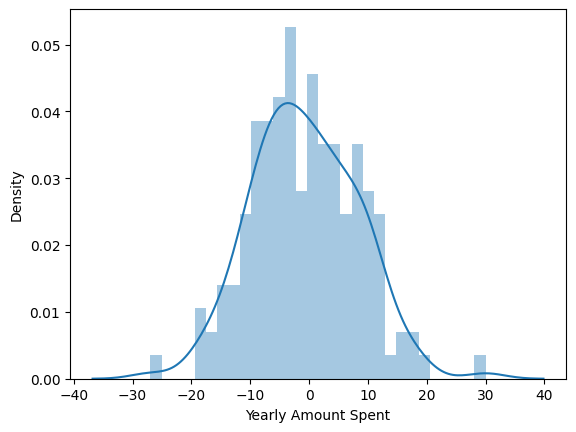

In [68]:
residuals=y_test-prediction
sns.distplot(residuals,bins=30)

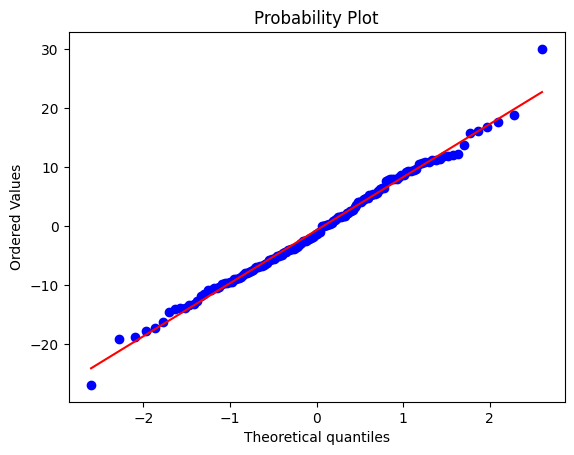

In [69]:
import pylab
import scipy.stats as stats
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()